# Using CV2 facial detection

In [2]:
import cv2

def detect_faces_with_cv2(frame):
    classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    # The scaleFactor controls how the input image is scaled prior to detection, e.g. is it scaled up or down, 
    # which can help to better find the faces in the image. Lowering the value will detect more faces but might 
    # include some false positive
    scale_factor = 1.05
    
    # How robust the detection should be. Lowering this will detect more faces with more false positive.
    # Increasing it will require more confidence before the face is detected
    min_neighbors = 10
    
    bboxes = classifier.detectMultiScale(frame)
    for box in bboxes:
        x, y, width, height = box
        x2, y2 = x + width, y + height
        cv2.rectangle(frame, (x, y), (x2, y2), (0,0,255), 1)

    cv2.imshow('face detection', frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


    

test1 = cv2.imread('test1.jpeg')
detect_faces_with_cv2(test1)

test2 = cv2.imread('test2.jpeg')
detect_faces_with_cv2(test2)

img_path = 'output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/000.png'
fake = cv2.imread(img_path)
detect_faces_with_cv2(fake)

   # Using MTCNN

In [18]:
# Check that this worked. I had to run:
# python -m pip install –upgrade pip
# pip install keras==2.1.5
# Or it will keep throwing error that it requires Tensorflow 2.2.0, even though I have one
# See https://stackoverflow.com/questions/63006475/how-to-solve-importerror-keras-requires-tensorflow-2-2-or-higher-install-tenso
import mtcnn

print(mtcnn.__version__)

AttributeError: module 'tensorflow_core.compat.v2' has no attribute '__internal__'

In [11]:
import cv2
from mtcnn import MTCNN

model = MTCNN(min_face_size=20, scale_factor=0.709) # These inputs are default value, could be changed


test2 = cv2.imread('test2.jpeg')
faces = model.detect_faces(test2)

for face in faces:
    print(face)

ModuleNotFoundError: No module named 'tensorflow.compat.v2'

# Using dlib

[250 120]
[206 110]
Angle = 12.804266065286752
Scale = 1.7020500755632755
Eye center = (228, 115)
[[   1.65972495    0.37721022 -193.79646365]
 [  -0.37721022    1.65972495   10.13555992]]
[435 140]
[392 133]
Angle = 9.246112745563252
Scale = 1.7628408914107725
Eye center = (413, 136)
[[ 1.73993678e+00  2.83245522e-01 -3.44115279e+02]
 [-2.83245522e-01  1.73993678e+00  1.63489989e+01]]
Done


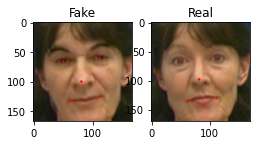

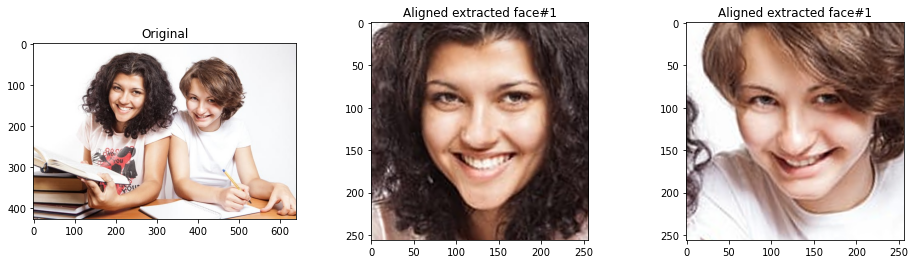

In [62]:
import cv2
import dlib
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt


# function to convert dlib.full_object_detection to numpy array
def shape_to_np(shape, dtype="int"):
    coords = np.zeros((68, 2), dtype=dtype)
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    return coords

def detect_faces(image):
    # This CNN detector doesn't seem to get the whole face, switching to 
    # haar cascade with opencv2
    # cnn_face_detector = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')
    # faces = cnn_face_detector(image)
    face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(
        gray_image,
        scaleFactor=1.10,
        minNeighbors=5
    )
    return faces

def draw_faces_boxes(image, faces):
    
    for face in faces:
        # Draw box on face
        # Extract from CNN detector. It use rect object
    #     rect = face.rect
    #     x = rect.left()
    #     y = rect.top()
    #     w = rect.right() - x
    #     h = rect.bottom() -y

        # Extract from haar cascade output
        x,y,w,h = face
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
    

def detect_landmarks(image, faces):
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    for face in faces:    
        # Draw circle on features
        x,y,w,h = face
        drect = dlib.rectangle(int(x),int(y),int(x+w),int(y+h))
        
        predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
        landmarks = predictor(gray_image, drect)
        points = shape_to_np(landmarks)
    return points

def draw_all_landmarks(image, points):
    for p in points:
        x, y = p[0], p[1]
        cv2.circle(image, (x,y), 2, (255,0,255), -1)
        
def get_left_eyes(landmarks):
    return landmarks[36:42]

def get_right_eyes(landmarks):
    return landmarks[42:48]

def get_eye_center(cluster):
    return cluster.mean(axis=0).astype("int")

def draw_major_landmarks(image, points):
    left_eye_cluster = get_left_eyes(points)
    right_eye_cluster = get_right_eyes(points)
    left_eye = get_eye_center(left_eye_cluster)
    right_eye = get_eye_center(right_eye_cluster)
    nose = points[30]
    left_mouth = points[48]
    right_mouth = points[54]
    
    for p in [left_eye, right_eye, nose, left_mouth, right_mouth]:
        x, y = int(p[0]), int(p[1])
        cv2.circle(image, (x,y), 2, (0,0,255), -1)

### Testing the functions above
# image_path = 'output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/000.png'
# image = cv2.imread(image_path)
# gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")



# faces = detect_faces(image)

# draw_faces_boxes(image, faces)

# landmarks = detect_landmarks(gray_image, faces)

# # draw_all_landmarks(image, landmarks)
# draw_major_landmarks(image, landmarks)

    
    
# cv2.imshow("Face detected", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

def mkdirp(path):
    dir_name = os.path.dirname(path)
    if not os.path.exists(dir_name):
        print(f'Directory {dir_name} does not exists, creating a new one')
        os.makedirs(dir_name)

def crop(image, bbx):
    return image[bbx[1]:bbx[1]+bbx[3], bbx[0]:bbx[0]+bbx[2], :].copy()

def plot(title, image):
    converted_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(converted_img)
    plt.title(title)
    
def detect_and_save_faces(video_path, box_scale=0.15, limit_frame=3, save_faces=False):
    cap = cv2.VideoCapture(video_path)
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    face_imgs = []
    img_file_prefix = 'detected_faces_folder/' + os.path.splitext(video_path)[0] + '_face'
    
    # DEBUG Plot frames to see what's in side
    # plt.figure(figsize=(16,4))
    
    num_frames = min(num_frames, limit_frame)
    
    for frame_no in range(num_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
        ret, frame = cap.read()
        
        
        
        # DEBUG Plot frames to see what's in side
        # plt.subplot(int(num_frames/3), 3, frame_no + 1)
        
        # plot(f'Frame {frame_no}', frame)
        
        face_positions = detect_faces(frame)
        # print(f'Detect {len(faces)} face(s), in frame no {frame_no}')
        for position in face_positions:
            croped_img = crop(frame, position)
            face_imgs.append(croped_img)
            
            if save_faces:
                output_path = f'{img_file_prefix}_{str(frame_no)}.jpg'
                mkdirp(output_path)
                print(f'Output: {output_path}')
                cv2.imwrite(output_path, croped_img)
    return face_imgs
    
fake_path = 'DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1.avi'
real_path = 'VidTIMIT/fadg0/sa1.avi'

fake_faces = detect_and_save_faces(fake_path)
real_faces = detect_and_save_faces(real_path)

# # Plot detected fake, real faces and diff
# # diff = fake_faces[0] - real_faces[0]

# plt.figure(figsize=(16,4))

# plt.subplot(1,3,1)
# plot('Detected fake', fake_faces[0])

# plt.subplot(1,3,2)
# plot('Detected real', real_faces[0])

# # plt.subplot(1,3,3)
# # plot('Diff', diff)

def detect_landmarks_on_face(face_img):
    return detect_landmarks(face_img, [(0,0,face_img.shape[0], face_img.shape[1])])

fake_face = fake_faces[0]
real_face = real_faces[0]


landmarks = detect_landmarks_on_face(fake_face)
draw_major_landmarks(fake_face, landmarks)

landmarks = detect_landmarks_on_face(real_face)
draw_major_landmarks(real_face, landmarks)

plt.subplot(1,3,1)
plot('Fake', fake_face)
plt.subplot(1,3,2)
plot('Real', real_face)

def eyes_angle(left_eye, right_eye):
    d_x, d_y = right_eye - left_eye
    return np.degrees(np.arctan2(d_y, d_x))

def scaling_factor(left_eye, right_eye, desired_left_eye, desired_face_width):
    desired_right_eye_x = 1.0 - desired_left_eye[0]
    desired_dist = (desired_right_eye_x - desired_left_eye[0])
    desired_dist *= desired_face_width

    d_x, d_y = right_eye - left_eye
    dist = np.sqrt((d_x ** 2) + (d_y ** 2))

    scale = desired_dist/dist
    return scale

class FaceAligner:
    def __init__(self, 
                 desired_left_eye=(0.35, 0.35), 
                 desired_face_width=256, 
                 desired_face_height = None
                ):
        self.desired_left_eye = desired_left_eye
        self.desired_face_width = desired_face_width
        self.desired_face_height = desired_face_height
        
        if self.desired_face_height is None:
            self.desired_face_height = self.desired_face_width
    
    def align(self, image, rect=None):
        if rect is None:
            print('rect is None')
        landmarks = detect_landmarks(image, [rect])
        right_eye_center = get_eye_center(get_right_eyes(landmarks))
        left_eye_center = get_eye_center(get_left_eyes(landmarks))
        print(right_eye_center)
        print(left_eye_center)
        angle = eyes_angle(left_eye_center, right_eye_center)
        print(f'Angle = {angle}')
        
        scale = scaling_factor(
            left_eye_center, 
            right_eye_center,
            self.desired_left_eye,
            self.desired_face_width
        )
        print(f'Scale = {scale}')
        
        eye_center = (
            (left_eye_center[0] + right_eye_center[0]) // 2,
            (left_eye_center[1] + right_eye_center[1]) // 2
        )
        print(f'Eye center = {eye_center}')
        
        rotation_matrix = cv2.getRotationMatrix2D(eye_center, angle, scale)
        print(rotation_matrix)
        
        t_x = self.desired_face_width * 0.5
        t_y = self.desired_face_height * self.desired_left_eye[1]
        rotation_matrix[0, 2] += (t_x - eye_center[0])
        rotation_matrix[1, 2] += (t_y - eye_center[1])
        
        output = cv2.warpAffine(
            image, 
            rotation_matrix, 
            (self.desired_face_width, self.desired_face_height),
            flags=cv2.INTER_CUBIC
        )
        return output
        
plt.figure(figsize=(16,4))
aligner = FaceAligner()

## Fake image
# fake_image = cv2.imread('output_folder/DeepfakeTIMIT/higher_quality/fadg0/sa1-video-fram1/000.png')
# face_positions = detect_faces(fake_image)
# aligned_fake_img = aligner.align(fake_image, rect=face_positions[0])

# plt.subplot(2,2,1)
# plot('Original fake', fake_image)

# plt.subplot(2,2,2)
# plot('Aligned fake', aligned_fake_img)

## test1.jpeg
test1 = cv2.imread('test1.jpeg')
face_positions = detect_faces(test1)
aligned_face_img1 = aligner.align(test1, rect=face_positions[0])
aligned_face_img2 = aligner.align(test1, rect=face_positions[1])

plt.subplot(1,3,1)
plot('Original', test1)

plt.subplot(1,3,2)
plot('Aligned extracted face#1', aligned_face_img1)

plt.subplot(1,3,3)
plot('Aligned extracted face#1', aligned_face_img2)

print('Done')